In [64]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath

In [65]:
# constants
Lc=sp.Symbol('L_c')
Lc=1 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=1 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [66]:
# dimensional parameters
n=sp.Symbol('n')
n=1023 #CHANGEABLE
A=sp.Symbol('A')
A=0 #CHANGEABLE
B=sp.Symbol('B')
B=75 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
Omega=sp.Symbol('\Omega')
Omega=2 #CHANGEABLE
M=sp.Symbol('M')
M=0.5 #CHANGEABLE

In [67]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc

In [68]:
# dimensional grid
Xi=sp.Symbol('X_i')
Xi=np.linspace(A+S,B-S,n)
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a+s,b-s,n)

In [69]:
# dimensional Coulomb potential
V=sp.Function('V_{QHO}')
def V(X,l):
    return (l*(l+1))/(X**2)-2/X
# non-dimensional Coulomb potential
v=sp.Function('v_{QHO}')
def v(V):
    return V/Vc
vi=sp.Symbol('v_i')
vi=v(V(Xi,0))
Vi=V(Xi,0)

In [70]:
# auxiliary variables
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*vi

In [71]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [72]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]
eigvec=np.linalg.eigh(H)[1]
(eigval)[0]/(s*s*alpha)

In [73]:
# transpose eigvec to make an easier to use array
Psi=eigvec.T

Text(0, 0.5, '$\\psi_n(x)$')

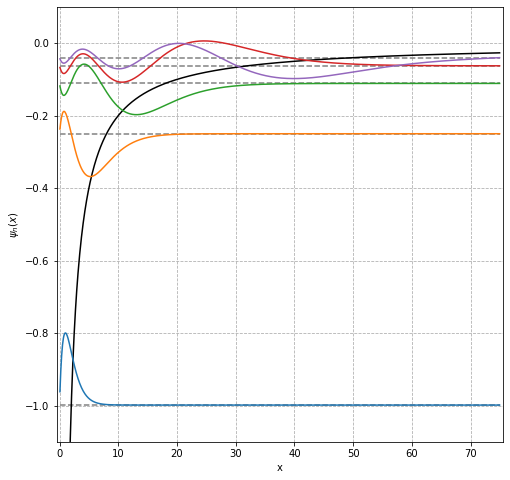

In [74]:
# graph of Morse eigenstates
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-1.1,0.1)
plt.plot(Xi,vi,color='black')
i=0
for i in range(0,5):
    if i == 0:
        plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
    else: 
        if (i % 4) == 3 or (i % 4) == 0:
            plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
        else:
            plt.plot(Xi,Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))  
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='grey',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

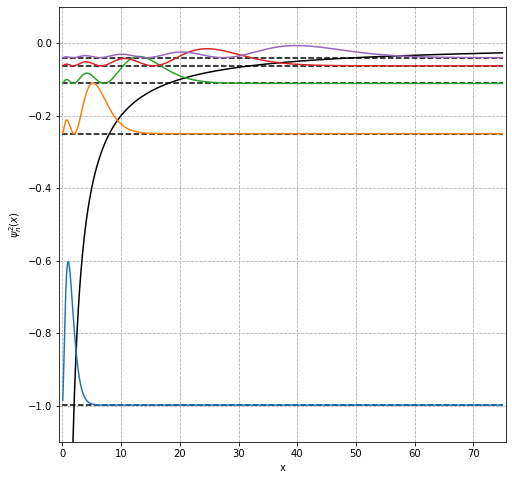

In [75]:
# graph of Morse eigenstates probability densities
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-1.1,0.1)
plt.plot(Xi,vi,color='black')
i=0
for i in range(0,5):
    plt.plot(Xi,(Psi[i]/np.sqrt(Lc))**2*10+eigval[i]/(s*s*alpha))
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')